In [2]:
!pip install torch

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("dark_background")
# plt.style.use("seaborn-v0_8")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [86]:
from torch.utils.data import Dataset, DataLoader

class RegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X.float()
        self.y = y.float().view(-1, 1)

    def __len__(self):
        return len(self.X)


    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [78]:
#                 +---------+
# x1 ---- w1 ---->|         |
#                 |         |
# x2 ---- w2 ---->|  ŷ =   |
#                 |  wᵀx+b  |----> y_hat
# x3 ---- w3 ---->|         |
#                 |         |
# x4 ---- w4 ---->|         |
#                 +---------+
#                      ^
#                      |
#                    bias
#                      b

# Single neuron with n inputs, 1 output
class LinearRegression(nn.Module):
    def __init__(self, n):
        super().__init__()
        self.linear = nn.Linear(n, 1)
        
    def forward(self, x):
        return self.linear(x)

In [79]:
def produce_data(m, n, lo=0, hi=10):    
    X = np.random.uniform(low=lo, high=hi, size=(m, n))
    w = np.random.uniform(low=-5, high=5, size=(n, 1))
    b = np.random.uniform(low=-5, high=5, size=(m, 1))
    noise = np.random.normal(loc=1, scale=2, size=(m, 1))

    y = X @ w + b + noise
    return torch.from_numpy(X).float(), torch.from_numpy(y).float()

In [109]:
X, y = produce_data(1000, 1)
X = (X - X.mean(axis=0))/X.std(axis=0)

In [110]:
model = LinearRegression(X.shape[1])
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)

dataset = RegressionDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [111]:
num_epochs = 100
for _ in range(num_epochs):
    for xb, yb in loader:
        y_pred = model(xb)
        loss = criterion(y_pred, yb)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

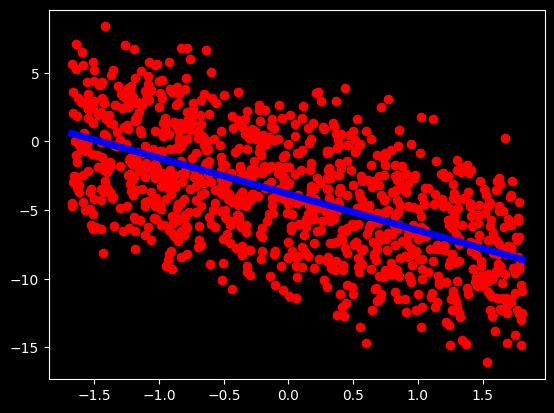

In [112]:
plt.scatter(X, y, color="red")

x_fit = torch.tensor(
    [X[:, 0].min(), X[:, 0].max()]
).view(-1, 1)
y_fit = model(x_fit)

plt.plot(x_fit.detach().cpu().numpy(), y_fit.detach().cpu().numpy(), color="blue", lw=5)
plt.show()